In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
excel_path = "Data set.xlsx"
sheet_names = ["Transient IC1(1)"]
data = {sheet_name: pd.read_excel(excel_path, sheet_name=sheet_name) for sheet_name in sheet_names}

inputs = data["Transient IC1(1)"]

X = inputs.iloc[:, 1:7].values.astype(np.float32)
y_ic1_1 = inputs.iloc[:, 7:12].values.astype(np.float32)

input_names = ['TL1 Length (mm)', 'TL2 Length (mm)', 'R1 (Ohm)', 'TL1 Impedance (Ohm)', 'TL2 Impedance (Ohm)']
output_names = ['Maximum (V)', 'Minimum (V)', 'Overshoot 1st Rising (V)', 'Rise Time 20/80 (ns)', 'Fall Time 20/80 (ns)']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_ic1_1_scaled = scaler_y.fit_transform(y_ic1_1)


In [ ]:
model_ic1_1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,),
                       name='input_layer'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer1'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer2'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer3'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer4'),
    keras.layers.Dense(5, name='output_layer_ic1')
], name='FFN_model_ic1')

model_ic1_1.compile(optimizer='adam', loss='mse')

X_train_ic1_1, X_test_ic1_1, y_ic1_1_train, y_ic1_1_test = train_test_split(X_scaled, y_ic1_1_scaled, test_size=0.2, random_state=42)

history_ic1_1 = model_ic1_1.fit(X_train_ic1_1, y_ic1_1_train, epochs=200, validation_data=(X_test_ic1_1, y_ic1_1_test))

loss_ic1_1 = model_ic1_1.evaluate(X_test_ic1_1, y_ic1_1_test)
print("IC1(1) Test Loss:", loss_ic1_1)

predictions_ic1_1_scaled = model_ic1_1.predict(X_test_ic1_1)
predictions_ic1_1 = scaler_y.inverse_transform(predictions_ic1_1_scaled)


mse = mean_squared_error(y_ic1_1_test, predictions_ic1_1_scaled)
print('Mean Squared Error (MSE):', mse)

mae = mean_absolute_error(y_ic1_1_test, predictions_ic1_1_scaled)
print('Mean Absolute Error (MAE):', mae)

r2 = r2_score(y_ic1_1_test, predictions_ic1_1_scaled)
print('R-squared (R2) Score:', r2)

model_ic1_1.save("path/to/save/model_ic1_1.h5")


Epoch 1/200
8/8 [==============================] - 2s 49ms/step - loss: 0.9345 - val_loss: 0.9790
Epoch 2/200
8/8 [==============================] - 0s 17ms/step - loss: 0.8249 - val_loss: 0.8389
Epoch 3/200
8/8 [==============================] - 0s 22ms/step - loss: 0.6845 - val_loss: 0.6698
Epoch 4/200
8/8 [==============================] - 0s 22ms/step - loss: 0.5288 - val_loss: 0.5173
Epoch 5/200
8/8 [==============================] - 0s 17ms/step - loss: 0.3895 - val_loss: 0.4044
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 0.3060 - val_loss: 0.3581
Epoch 7/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2733 - val_loss: 0.3105
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 0.2395 - val_loss: 0.2729
Epoch 9/200
8/8 [==============================] - 0s 12ms/step - loss: 0.2123 - val_loss: 0.2490
Epoch 10/200
8/8 [==============================] - 0s 11ms/step - loss: 0.1864 - val_loss: 0.2163
Epoch 11/200
8/8 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


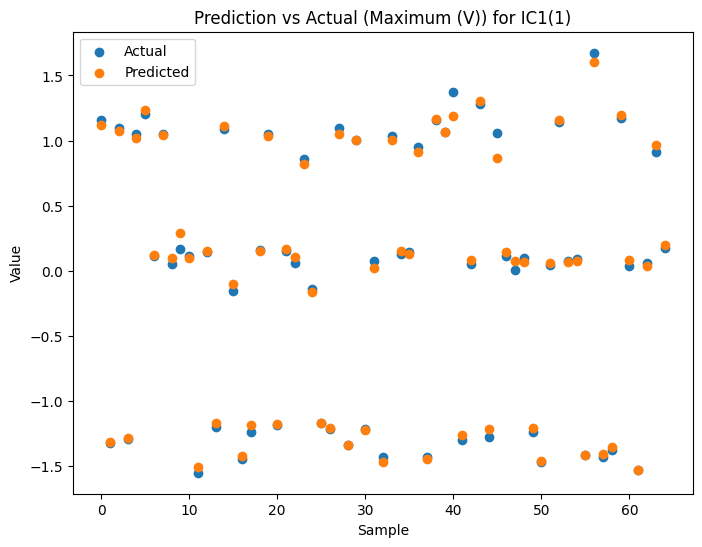

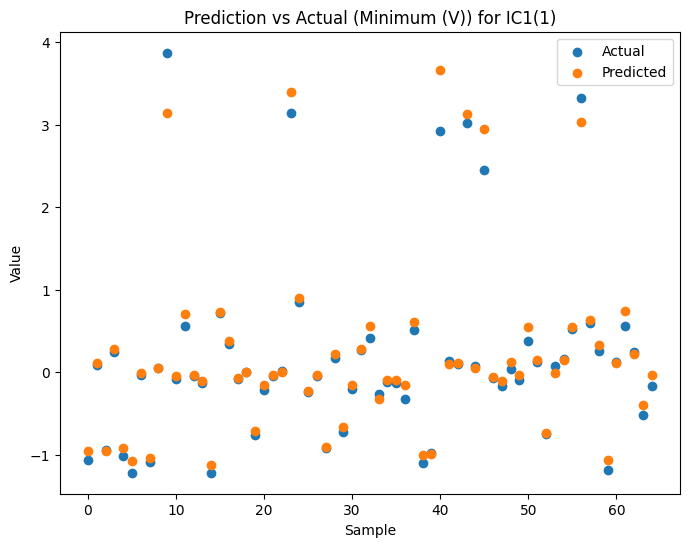

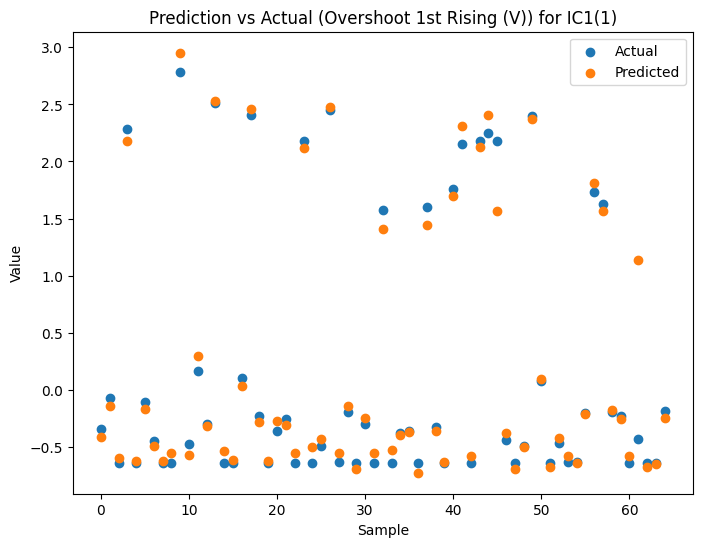

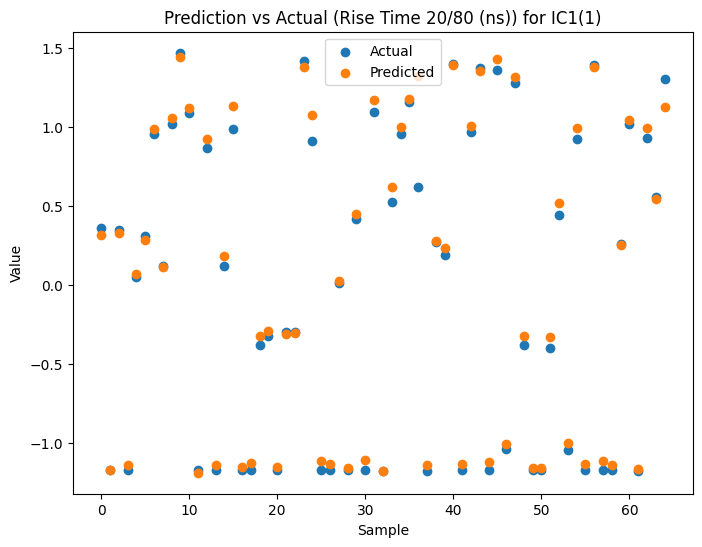

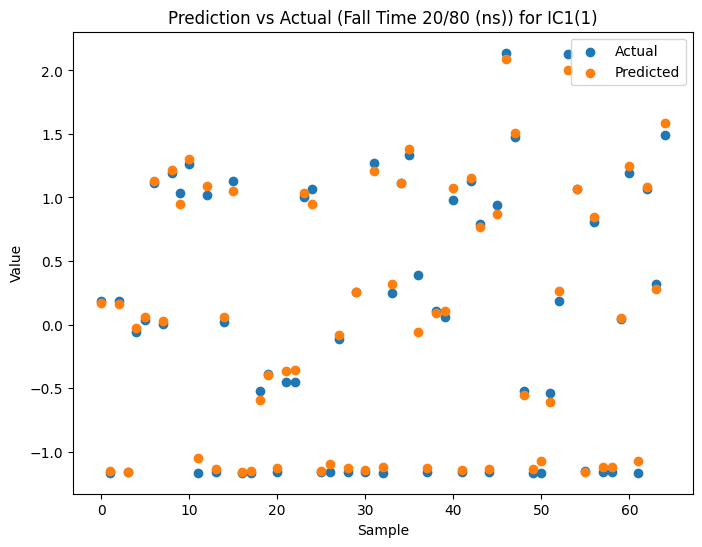

In [ ]:

for i, output_name in enumerate(output_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_ic1_1_test)), y_ic1_1_test[:, i], label='Actual')
    plt.scatter(range(len(y_ic1_1_test)), predictions_ic1_1_scaled[:, i], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(f'Prediction vs Actual ({output_name}) for IC1(1)')
    plt.legend()
    plt.show()

In [ ]:

new_inputs = np.array([[50, 50, 50, 100, 103.544, 108]], dtype=np.float32)
new_inputs_scaled = scaler_X.transform(new_inputs)
predictions_ic1_1_new = model_ic1_1.predict(new_inputs_scaled)

predictions_ic1_1_new = scaler_y.inverse_transform(predictions_ic1_1_new)


print("Predictions for new inputs (IC1(1)):")
for i, output_name in enumerate(output_names):
    print(f"{output_name}: {predictions_ic1_1_new[0][i]:.3f}")




1/1 [==============================] - 0s 20ms/step
Predictions for new inputs (IC1(1)):
Maximum (V): 2.267
Minimum (V): 0.162
Overshoot 1st Rising (V): 0.084
Rise Time 20/80 (ns): 0.313
Fall Time 20/80 (ns): 0.114


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
